<a href="https://colab.research.google.com/github/ajisafeadediwura/Diabetes-dataset-trained-with-DT-model/blob/main/DT%20training%20on%20diabetes%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is a machine learning project that uses a Decision Tree Classifier to predict whether a person has diabetes based on certain features.

The code starts by importing necessary libraries:

- numpy and pandas for data manipulation and analysis
- seaborn and matplotlib for data visualization
- sklearn for machine learning tasks


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score,precision_score

The code loads a CSV file containing diabetes data into a pandas DataFrame df. It then:

- Checks for missing values using isnull().sum()
- Plots the class distribution of the target variable "Outcome" using a bar chart
- Calculates the correlation matrix df_corr and plots a heatmap to visualize the correlations between features

In [4]:
df=pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.isnull().sum()#

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


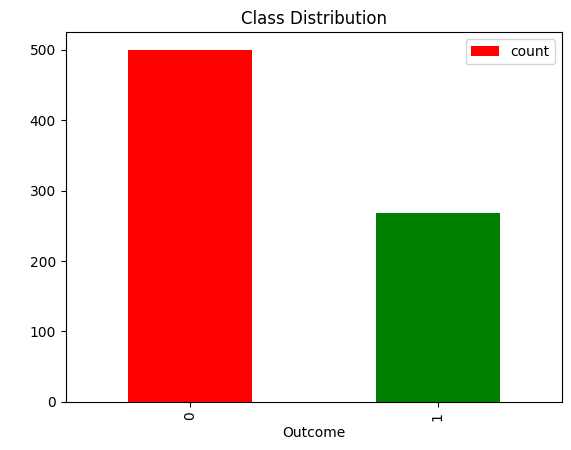

In [9]:
y=df["Outcome"].value_counts()
y.plot(kind='bar', color=['red','green'])
plt.title("Class Distribution")
plt.ylabel(' ')
plt.legend()

In [10]:
df_corr=df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
df_corr['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


Text(0.5, 1.0, 'Heat Map')

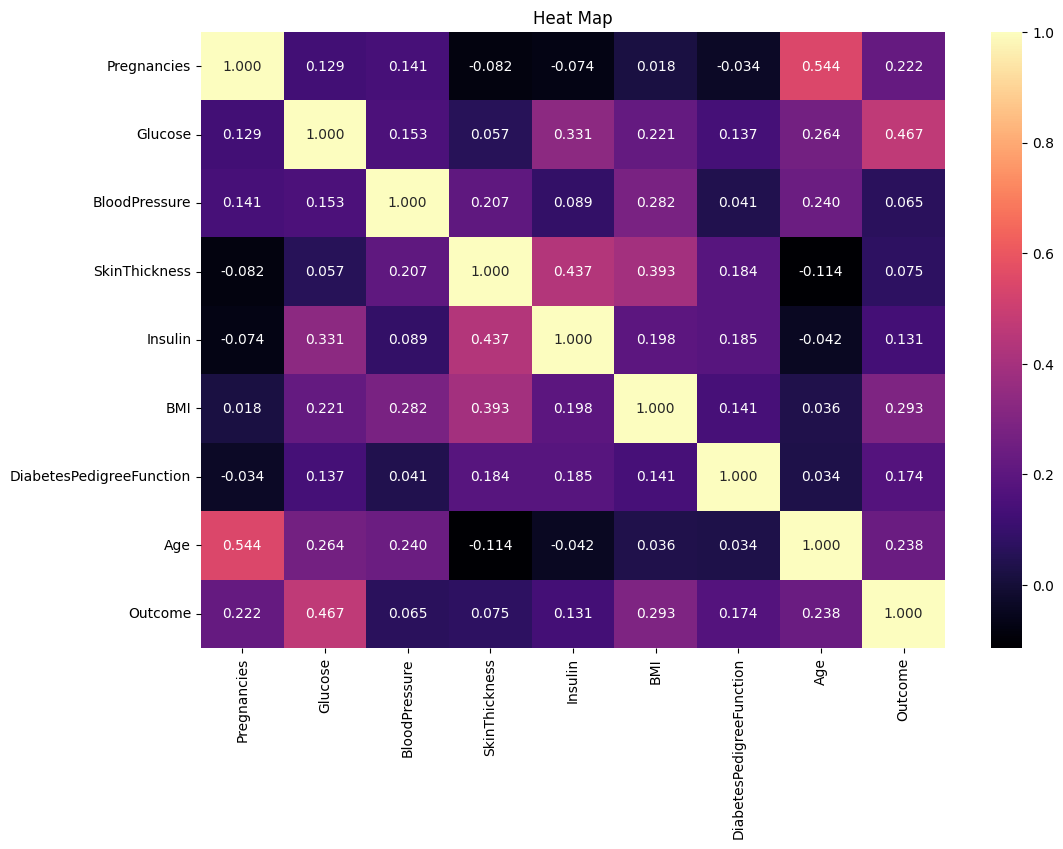

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True, cmap="magma",fmt="0.3f")
plt.title("Heat Map")

**Data Preprocessing**

The code:

- Splits the data into features x and target variable y
- Scales the features using StandardScaler to have zero mean and unit variance
- Splits the data into training and testing sets using train_test_split

In [13]:
y=df["Outcome"]
x=df.iloc[:,0:8]
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

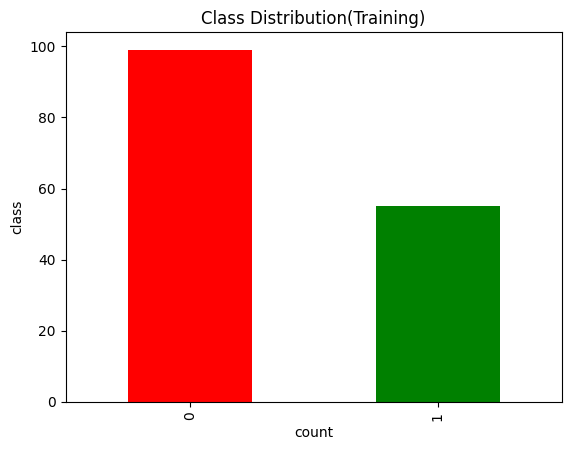

In [15]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
y_test.value_counts().plot(kind='bar',color=['red','green'])
plt.title('Class Distribution(Training)')
plt.xlabel('count')
plt.ylabel('class')
plt.legend

**Model Training and Evaluation**

The code:

- Trains a Decision Tree Classifier on the training data
- Makes predictions on the testing data
- Evaluates the model's performance using accuracy, precision, F1 score, and confusion matrix

In [16]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [17]:
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("F1 Score",f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7467532467532467
Precision: 0.625
F1 Score 0.6722689075630253
Confusion Matrix:
[[75 24]
 [15 40]]


**Model Visualization**

The code:

- Plots the decision tree using plot_tree
- Plots the feature importance using a bar chart

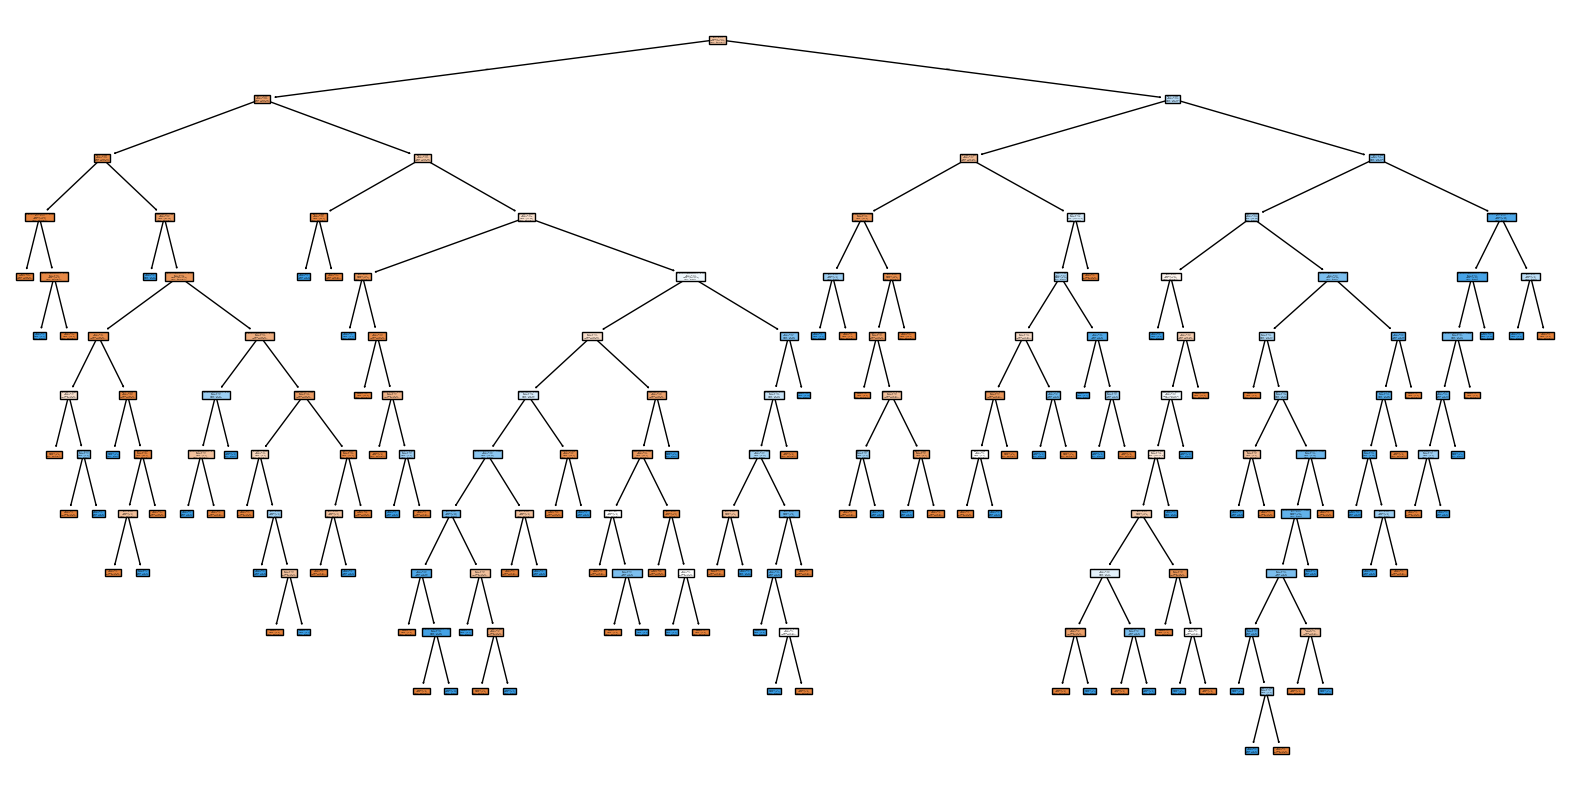

In [18]:
plt.figure(figsize=(20,10))
plot_tree(model,feature_names = df.columns, class_names=["Non-Diabetic","Diabetic"],filled=True)
plt.show()

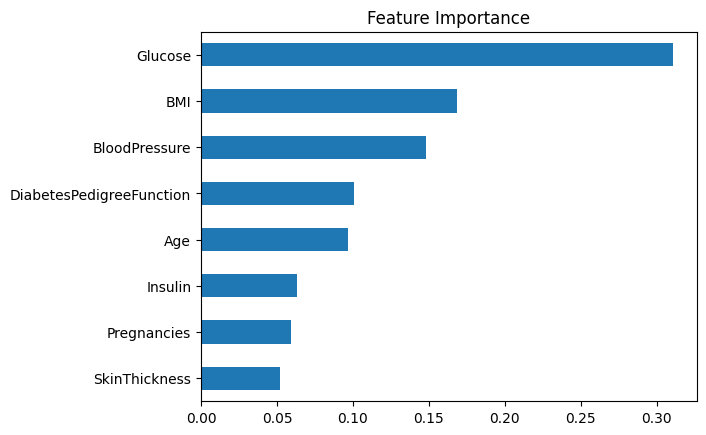

In [19]:
feat_importance=pd.Series(model.feature_importances_,index=df.columns[0:8])
feat_importance.sort_values().plot(kind='barh',title='Feature Importance')
plt.show()